

<div align="center">
    <h1><b> The Analysis of Tour and Travel Company<b></h1>
</div>

---
### Problem Statement:

A tour & travels company wants to predict whether a customer will churn or not. Based on a few customer characteristics like their age, frequent flyer status, annual income class, services opted, account synced to social media, booked hotel or not, Target.

The analysis and forecasting are based on the customer churn's impact on yearly income, hotel reservations, and whether or not they were made in order to assist the business in developing predictive models, saving money, and performing fascinating EDAs.

---


### Assumptions:

1.No unusual occurrences will have a substantial impact on the data we used (Outliers).

2.The data we used is current data and can be used to analyse and make prediction for the organization.

3.There are no unanticipated negatives to the company employing any advised technique.

---

### Research Questions:

1.How Hotel Booking and Annual Income effect customer churn?

2.How can we prevent customer churn?

---

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
data= pd.read_csv('Customertravel.csv')

In [3]:
data

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


---
<div align="center">
    <h1><b> Dataset Description:<b></h1>
</div>

| **Column Name**                          | **Description**                                                      |
|------------------------------------------|----------------------------------------------------------------------|
| **Age**                                  | Age of user                                                          |
| **Frequent Flyer**                       | Whether Customer takes frequent flights                              |
| **Annual Income Class**                  | Class of annual income of user                                        |
| **Services Opted**                       | Number of times services opted during recent years                   |
| **Account Synced To Social Media**       | Whether Company Account Of User Synchronised to Their Social Media    |
| **Booked Hotel Or Not**                  | Whether the customer book lodgings/Hotels using company services      |
| **Target**                               | 1- Customer Churns, 0- Customer Doesn’t Churn                        |


---
# Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [5]:
data.columns.tolist()

['Age',
 'FrequentFlyer',
 'AnnualIncomeClass',
 'ServicesOpted',
 'AccountSyncedToSocialMedia',
 'BookedHotelOrNot',
 'Target']

In [6]:
data.shape

(954, 7)

In [7]:
data.dtypes

Age                            int64
FrequentFlyer                 object
AnnualIncomeClass             object
ServicesOpted                  int64
AccountSyncedToSocialMedia    object
BookedHotelOrNot              object
Target                         int64
dtype: object

In [8]:
data.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


### **check catagorical columns:**

In [9]:
catagorical_columns= data.select_dtypes(include=[object])
catagorical_columns.head(2)

,FrequentFlyer,AnnualIncomeClass,AccountSyncedToSocialMedia,BookedHotelOrNot
0,No,Middle Income,No,Yes
1,Yes,Low Income,Yes,No


### check numerical columns:

In [10]:
numerical_columns= data.select_dtypes(include=np.number)
numerical_columns.head(2)

,Age,ServicesOpted,Target
0,34,6,0
1,34,5,1


### Adding spaces to all column names

In [11]:
import re
# Function to add spaces between words in camelCase or PascalCase column names
def add_space_to_columns(col_name):
    return re.sub(r'(?<!^)(?=[A-Z])', ' ', col_name)

# Rename all columns in the DataFrame
data.columns = [add_space_to_columns(col) for col in data.columns]

print(data)

     Age Frequent Flyer Annual Income Class  Services Opted  \
0     34             No       Middle Income               6   
1     34            Yes          Low Income               5   
2     37             No       Middle Income               3   
3     30             No       Middle Income               2   
4     30             No          Low Income               1   
..   ...            ...                 ...             ...   
949   31            Yes          Low Income               1   
950   30             No       Middle Income               5   
951   37             No       Middle Income               4   
952   30             No          Low Income               1   
953   31            Yes         High Income               1   

    Account Synced To Social Media Booked Hotel Or Not  Target  
0                               No                 Yes       0  
1                              Yes                  No       1  
2                              Yes              

# Data Cleaning

In [12]:
data.isnull().sum()

Age                               0
Frequent Flyer                    0
Annual Income Class               0
Services Opted                    0
Account Synced To Social Media    0
Booked Hotel Or Not               0
Target                            0
dtype: int64

In [13]:
# check duplicate values
data.duplicated().sum()

507

In [14]:
data.drop_duplicates(keep='first',inplace=True)

In [15]:
# checking duplicate values again
data.duplicated().sum()

0

In [16]:
data.groupby('Annual Income Class')['Target'].agg('sum')

Annual Income Class
High Income      40
Low Income       64
Middle Income    18
Name: Target, dtype: int64

In [17]:
for i in data:
    print(data[i].unique())

[34 37 30 27 36 28 35 31 38 33 29]
['No' 'Yes' 'No Record']
['Middle Income' 'Low Income' 'High Income']
[6 5 3 2 1 4]
['No' 'Yes']
['Yes' 'No']
[0 1]


### frequency of catagory:

In [18]:
for col in data:
    print('\ncolumn name:',col)
    print(data[col].value_counts())


column name: Age
Age
30    70
34    51
37    45
31    42
29    42
28    40
27    36
36    36
35    34
33    26
38    25
Name: count, dtype: int64

column name: Frequent Flyer
Frequent Flyer
No           250
Yes          144
No Record     53
Name: count, dtype: int64

column name: Annual Income Class
Annual Income Class
Low Income       205
Middle Income    173
High Income       69
Name: count, dtype: int64

column name: Services Opted
Services Opted
1    150
4     80
2     71
3     63
5     55
6     28
Name: count, dtype: int64

column name: Account Synced To Social Media
Account Synced To Social Media
No     261
Yes    186
Name: count, dtype: int64

column name: Booked Hotel Or Not
Booked Hotel Or Not
No     258
Yes    189
Name: count, dtype: int64

column name: Target
Target
0    325
1    122
Name: count, dtype: int64


In [19]:
data['Services Opted'].unique()

array([6, 5, 3, 2, 1, 4], dtype=int64)

----
# Data Visualization

---

### Number of times services opted during recent years

---

The bar chart visualizes the frequency of the number of services opted by customers during recent years. From the graph, it is evident that:

- The majority of customers opted for 1 service, with a count of approximately 145.
- Fewer customers opted for 2 or 3 services, with counts near 65 and 60 respectively.
- The count increases again for 4 services, reaching around 85 customers.
- Fewer customers opted for 5 and 6 services, with the counts dropping to around 45 and 30 respectively.

This distribution suggests that most customers tend to opt for a single service, with only a small percentage opting for multiple services. The upward spike at 4 services could indicate a specific package or combination that is more attractive to some customers.

--- 


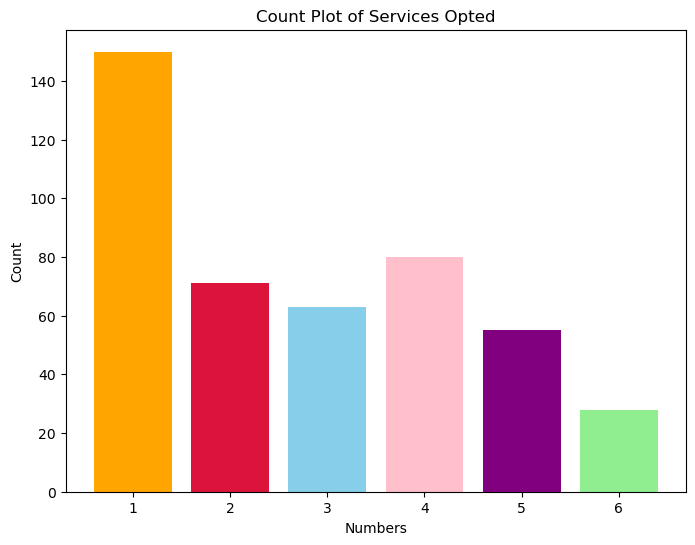

In [20]:
counts= data['Services Opted'].value_counts()

# Using Matplotlib to create a count plot
plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts,color=['orange','pink','#DC143C','skyblue','purple','lightgreen'])
plt.title('Count Plot of Services Opted')
plt.xlabel('Numbers')
plt.ylabel('Count')
plt.show()

### Count of customer take flights

---
From the bar plot, it is evident that the majority of customers do not take flights, as indicated by the large "No" category. A smaller proportion of customers avail their flights, while a few have no recorded data regarding flight usage. them too!

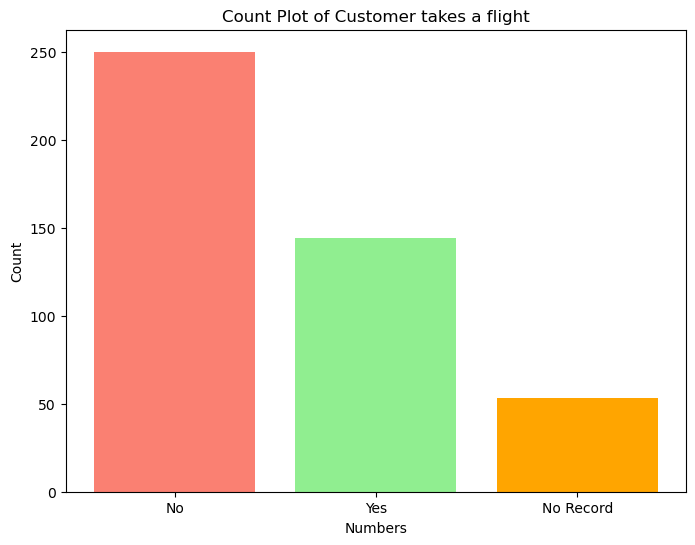

In [21]:
counts= data['Frequent Flyer'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts,color = ['salmon', 'lightgreen','orange'])
plt.title('Count Plot of Customer takes a flight')
plt.xlabel('Numbers')
plt.ylabel('Count')
plt.show()

In [22]:
data['Booked Hotel Or Not'].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
# replacing 0&1 into Booked and Not Booked
data['Booked Hotel Or Not'].replace(['Yes','No'],['Booked','Not Booked'],inplace=True)
data

,Age,Frequent Flyer,Annual Income Class,Services Opted,Account Synced To Social Media,Booked Hotel Or Not,Target
0,34,No,Middle Income,6,No,Booked,0
1,34,Yes,Low Income,5,Yes,Not Booked,1
2,37,No,Middle Income,3,Yes,Not Booked,0
3,30,No,Middle Income,2,No,Not Booked,0
4,30,No,Low Income,1,No,Not Booked,0
...,...,...,...,...,...,...,...
932,29,No,Low Income,3,Yes,Not Booked,0
936,36,No Record,Middle Income,1,Yes,Booked,0
940,27,No,Low Income,1,No,Booked,0
947,38,No Record,Middle Income,2,Yes,Not Booked,0


### How Hotel Bookings Affect Customer Churn

---
The bar plot illustrates that the percentage of customers who booked a hotel is higher than those who did not. This suggests that despite some cancellations, a larger proportion of customers proceed with booking their hotel. This behavior could indicate that many customers value having a hotel reservation in place, which may act as a retention factor for the company. Understanding this pattern could help the company focus on strategies to further reduce cancellations while encouraging more bookings.

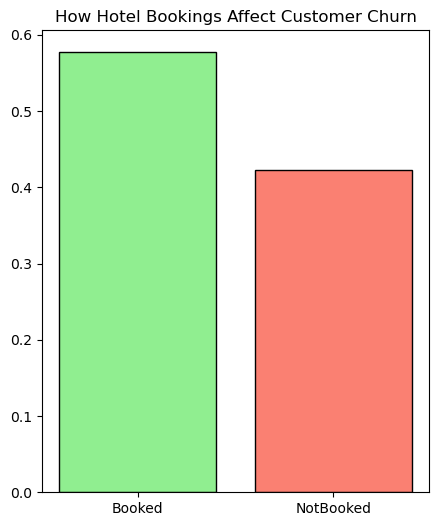

In [24]:
plt.figure(figsize=(5,6))
plt.bar(["Booked","NotBooked"], data ['Booked Hotel Or Not'].value_counts(normalize = 1), edgecolor = 'black', width = 0.8, color = ['lightgreen', 'salmon'])
plt.title('How Hotel Bookings Affect Customer Churn')
plt.show()

# Annual Income Visualization

### How Income Impacts Customer Churn

---
The pie chart shows the distribution of customer churn by annual income class, categorized into High, Middle, and Low income groups. Interestingly, the **Low Income** class contributes the highest percentage of profit to the hotel, despite being the least financially capable group. On the other hand, the **High Income** class provides the lowest profit contribution, which could suggest that wealthier customers may be opting for alternative services or travel packages. This insight can guide the company to focus more on retaining low-income customers, who appear to provide more consistent revenue, while also exploring ways to increase engagement with high-income customers.


In [25]:
income= data.groupby("Annual Income Class").size()
income

Annual Income Class
High Income       69
Low Income       205
Middle Income    173
dtype: int64

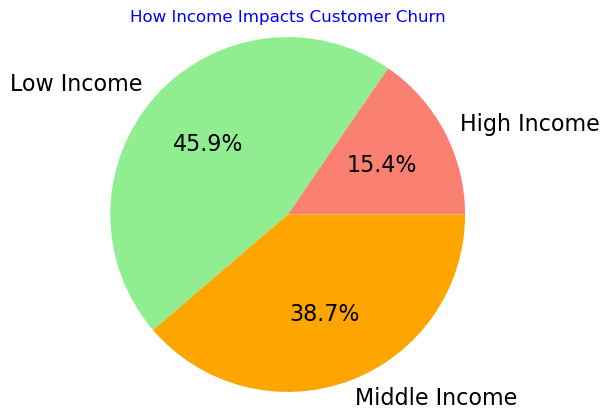

In [26]:
plt.pie(income.values, labels = ("High Income", "Low Income", "Middle Income" ), autopct='%1.1f%%', radius = 1.2, textprops = {"fontsize" : 16},colors=['salmon', 'lightgreen','orange'])
plt.title("How Income Impacts Customer Churn", c="b")
plt.show()

### Use pivot table to explore churn rates by 'Annual Income Class'

---

The pivot table reveals that **High Income** customers have the highest churn rates, indicating that they cancel bookings more frequently compared to other income groups. On the other hand, **Middle Income** customers show a relatively lower churn rate, implying that they are more likely to avail the company's services and offers. This suggests that while high-income customers might not be as engaged, middle-income customers represent a more loyal and consistent customer base. The company could focus on strategies to reduce churn among high-income customers, potentially through personalized offers or improved service packages.



In [27]:
pivot_income_churn = data.pivot_table(values='Target', index='Annual Income Class', aggfunc='mean')
pivot_income_churn.columns = ['ChurnRate']
pivot_income_churn

,ChurnRate
Annual Income Class,
High Income,0.579710
Low Income,0.312195
Middle Income,0.104046


### Count of Churn by Income Class

---

The churn rate is highest among **High Income** customers, indicating frequent cancellations. In contrast, **Middle** and **Low Income** customers show lower churn rates, with **Middle Income** customers being more likely to engage with company offers. Addressing the high churn rate in the high-income group could improve retention.

### Group by 'Annual Income Class' and count churn values (0 = no churn, 1 = churn)

In [28]:
group_income_churn = data.groupby('Annual Income Class')['Target'].value_counts(normalize=True).unstack()
group_income_churn

Target,0,1
Annual Income Class,,
High Income,0.420290,0.579710
Low Income,0.687805,0.312195
Middle Income,0.895954,0.104046


### Bar Plot: Churn Rate by Income Class

---


The bar plot of **Churn Rate by Annual Income Class** reveals that **High Income** customers have the highest churn rate, suggesting they are more likely to cancel their bookings or stop using the service. In contrast, **Middle Income** customers show a moderate churn rate, and **Low Income** customers have the lowest churn rate, indicating higher retention. This suggests that high-income customers may need targeted retention strategies, while middle and low-income customers tend to remain more loyal.

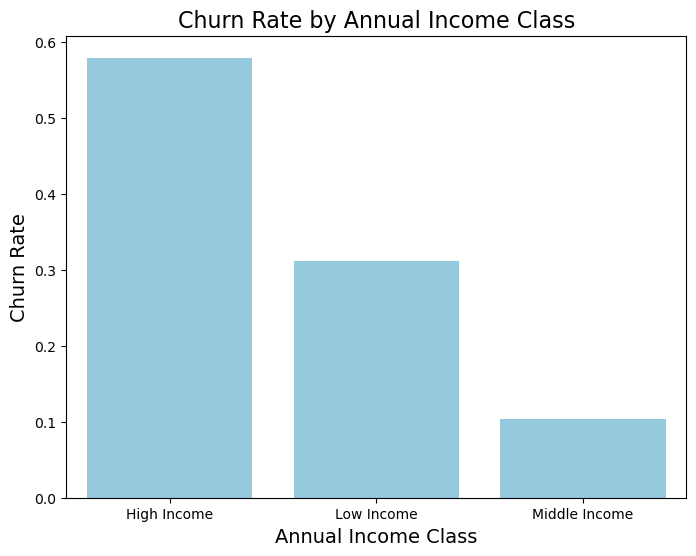

In [29]:
# Create a bar plot for churn rate by income class
plt.figure(figsize=(8, 6))
sns.barplot(x=pivot_income_churn.index, y=pivot_income_churn['ChurnRate'],color='skyblue')

plt.title('Churn Rate by Annual Income Class', fontsize=16)
plt.xlabel('Annual Income Class', fontsize=14)
plt.ylabel('Churn Rate', fontsize=14)
plt.show()


### Stacked Bar Plot: Churn Distribution by Income Class

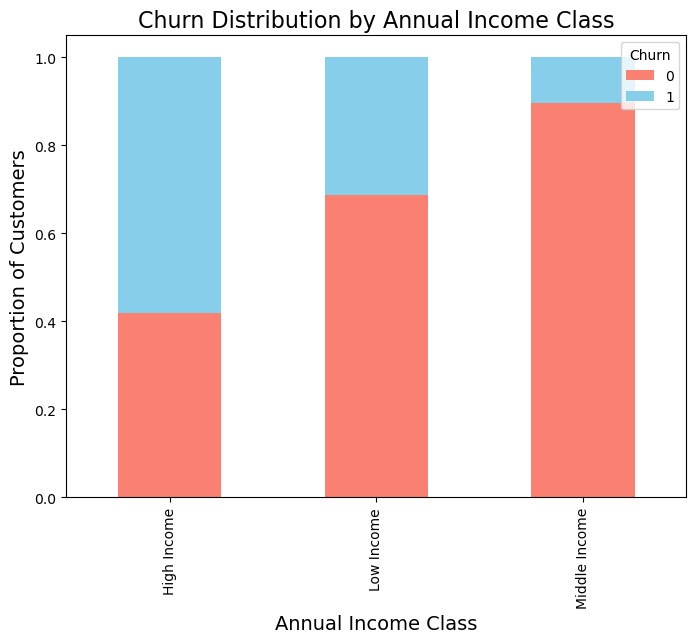

In [30]:
# Create a stacked bar plot for churn distribution by income class
group_income_churn.plot(kind='bar', stacked=True, figsize=(8, 6), color=['salmon', 'skyblue'])

plt.title('Churn Distribution by Annual Income Class', fontsize=16)
plt.xlabel('Annual Income Class', fontsize=14)
plt.ylabel('Proportion of Customers', fontsize=14)
plt.legend(title='Churn', loc='upper right')
plt.show()


### Summary:

Customers who have made hotel reservations account for 60% of the overall population, whereas those who have not made hotel reservations account for 39% of the population, which is a significant number.

We found that customers with the highest yearly income have the lowest proportion of customer churn, whereas those with the lowest (40%) and middle (42%), have the highest percentage of churn.

### Insights:

The largest customer churn has been observed when a consumer has not made a hotel reservation. This may be due to a number of factors, including expensive hotel rates and longer waiting lists for reservations, both of which have a substantial impact on why people don't book hotels. This may help us understand how to run the campaign in order to shorten the waiting list.

The highest customer churn have also seen in the situation where customer have low and middle income. This may give us an idea of the needs of the customers, and you can utilise the insights to work on how to lower your pricing without affecting your revenue, which you can then offer to your customers, which can prevent the customer churn.